In [254]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA

In [255]:
df = pd.read_csv('Train_SU63ISt.csv')
print(df.head(5))
print(df.shape)

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2
(18288, 3)


In [256]:
train = df[0:14630]
validation = df[14630:]

In [257]:
print(train.shape)
print(validation.shape)

(14630, 3)
(3658, 3)


# Naive approach

In [5]:
dd = np.asarray(train.Count)

y_hat = validation.copy()
y_hat['naive'] = dd[len(dd)-1]

y_hat.head(15)

,ID,Datetime,Count,naive
14630,14630,26-04-2014 14:00,204,206
14631,14631,26-04-2014 15:00,172,206
14632,14632,26-04-2014 16:00,184,206
14633,14633,26-04-2014 17:00,124,206
14634,14634,26-04-2014 18:00,190,206
14635,14635,26-04-2014 19:00,230,206
14636,14636,26-04-2014 20:00,236,206
14637,14637,26-04-2014 21:00,182,206
14638,14638,26-04-2014 22:00,212,206
14639,14639,26-04-2014 23:00,212,206


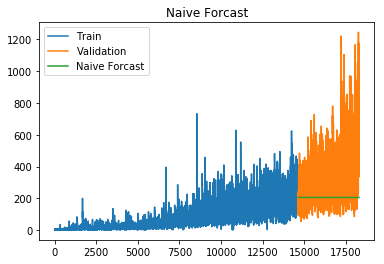

In [6]:
plt.plot(train.index, train['Count'], label='Train')
plt.plot(validation.index, validation['Count'], label='Validation')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forcast')
plt.legend(loc='best')
plt.title('Naive Forcast')
plt.show()

In [7]:
rms = sqrt(mean_squared_error(validation.Count, y_hat.naive))
print(rms)

224.37153344204816


# Simple average

In [8]:
y_hat_avg = validation.copy()
y_hat_avg['avg_forcast'] = train['Count'].mean()

y_hat_avg.head(15)

,ID,Datetime,Count,avg_forcast
14630,14630,26-04-2014 14:00,204,86.385373
14631,14631,26-04-2014 15:00,172,86.385373
14632,14632,26-04-2014 16:00,184,86.385373
14633,14633,26-04-2014 17:00,124,86.385373
14634,14634,26-04-2014 18:00,190,86.385373
14635,14635,26-04-2014 19:00,230,86.385373
14636,14636,26-04-2014 20:00,236,86.385373
14637,14637,26-04-2014 21:00,182,86.385373
14638,14638,26-04-2014 22:00,212,86.385373
14639,14639,26-04-2014 23:00,212,86.385373


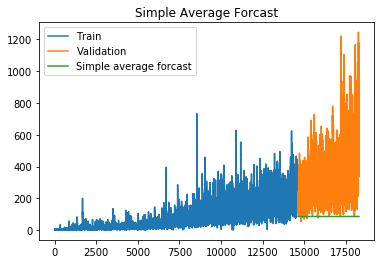

In [9]:
plt.plot(train.index, train['Count'], label='Train')
plt.plot(validation.index, validation['Count'], label='Validation')
plt.plot(y_hat_avg.index, y_hat_avg['avg_forcast'], label='Simple average forcast')
plt.legend(loc='best')
plt.title('Simple Average Forcast')
plt.show()

In [10]:
rms = sqrt(mean_squared_error(validation.Count, y_hat_avg.avg_forcast))
print(rms)

314.5039572329497


# Moving average 

Using simple exponential smoothing

In [94]:
y_hat_avg = validation.copy()
# best smoothing level value which gives lowest MSE 
fit1 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.02, optimized=True)
y_hat_avg['SES'] = fit1.forecast(len(validation))

#y_hat_avg.head(15)

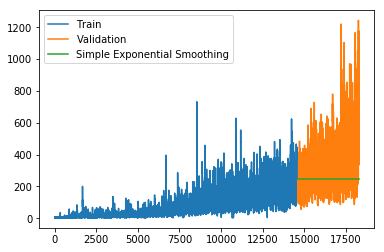

In [95]:
plt.plot(train['Count'], label='Train')
plt.plot(validation['Count'], label='Validation')
plt.plot(y_hat_avg['SES'], label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

In [96]:
rms = sqrt(mean_squared_error(validation.Count, y_hat_avg.SES))
print(rms)

200.96987269208284


Using exponential smoothing

In [91]:
y_hat_avg = validation.copy()
# best smoothing level value which gives lowest MSE
fit2 = ExponentialSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.02, optimized=True)
y_hat_avg['ES'] = fit2.forecast(len(validation))

#y_hat_avg.head(15)

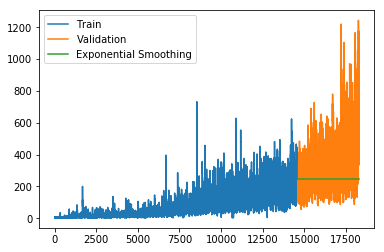

In [92]:
plt.plot(train['Count'], label='Train')
plt.plot(validation['Count'], label='Validation')
plt.plot(y_hat_avg['ES'], label='Exponential Smoothing')
plt.legend(loc='best')
plt.show()

In [93]:
rms = sqrt(mean_squared_error(validation.Count, y_hat_avg.ES))
print(rms)

200.96987269208284


Using Holt linear model

In [175]:
y_hat_avg = validation.copy()
fit3 = Holt(np.asarray(train['Count'])).fit(smoothing_level=0.01, smoothing_slope =0.1, optimized=True)
y_hat_avg['holt'] = fit3.forecast(len(validation))

#y_hat_avg.head(15)

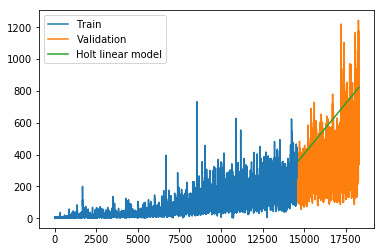

In [176]:
plt.plot(train['Count'], label='Train')
plt.plot(validation['Count'], label='Validation')
plt.plot(y_hat_avg['holt'], label='Holt linear model')
plt.legend(loc='best')
plt.show()

In [177]:
rms = sqrt(mean_squared_error(validation.Count, y_hat_avg.holt))
print(rms)

295.82291661615335


Using Holt Winter model

In [208]:
y_hat_avg = validation.copy()
fit4 = ExponentialSmoothing(np.asarray(train['Count']), seasonal_periods= 7, trend = 'add', seasonal= 'add').fit(optimized=True)
y_hat_avg['holtWinter'] = fit4.forecast(len(validation))

#y_hat_avg.head(15)

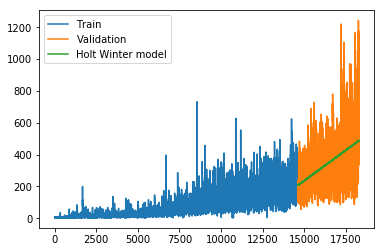

In [209]:
plt.plot(train['Count'], label='Train')
plt.plot(validation['Count'], label='Validation')
plt.plot(y_hat_avg['holtWinter'], label='Holt Winter model')
plt.legend(loc='best')
plt.show()

In [210]:
rms = sqrt(mean_squared_error(validation.Count, y_hat_avg.holtWinter))
print(rms)

158.75108178881916


MSE values wrt seasonal_periods: 
2 - 201
3 - 223
4 - 218
5 - 203.5
6 - 176.52
7 - 158.75
8 - 195

# ARIMA (Autoregressive integrated moving average)

R programming provides automated ways to solve the issue of identifying appropriate values for (p,d,q)

1. p = auto-regressive
2. d = integrated
3. q = moving average

In python, to solve this problem, we will use grid search to iteratively explore different combinations of parameters

In [322]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
rms = []

y_hat_avg = validation.copy()
for i in pdq:
    model = ARIMA(np.asarray(train['Count'], dtype='float64'), order=i).fit(disp=0)
    y_hat_avg['ARIMA'] = model.forecast(len(validation))[0]
    rms.append(sqrt(mean_squared_error(validation.Count, y_hat_avg.ARIMA)))

print(rms) 

[314.50395723294974, 314.5037857036886, 205.16586224289736, 204.06996869355962, 314.28592666156743, 314.2611208228448, 203.8913840106557, 189.95253623271233]


As we can see the minimum rms value is at (p,d,q) = (1,1,1)

In [331]:
y_hat_avg = validation.copy()
model = ARIMA(np.asarray(train['Count'], dtype='float64'), order=(1,1,1)).fit(disp=0)
y_hat_avg['ARIMA'] = model.forecast(len(validation))[0]

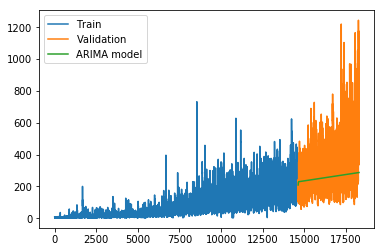

In [332]:
plt.plot(train['Count'], label='Train')
plt.plot(validation['Count'], label='Validation')
plt.plot(y_hat_avg['ARIMA'], label='ARIMA model')
plt.legend(loc='best')
plt.show()